# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [209]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

# Пункт №1

In [136]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


# Пункт №2

In [137]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [138]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


# Пункт №3

## Тренировочный датасет

In [139]:
df_train.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202


In [140]:
df_train.columns[df_train.isna().sum() > 0].tolist()

['mileage', 'engine', 'max_power', 'torque', 'seats']

## Тестовый датасет

In [141]:
df_test.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,19
engine,19


In [142]:
df_test.columns[df_train.isna().sum() > 0].tolist()

['mileage', 'engine', 'max_power', 'torque', 'seats']

# Пункт №4

## Тренировочный датасет

In [143]:
duplicates_count = df_train.duplicated().sum()

f"Количество явных дубликатов: {duplicates_count}" if duplicates_count > 0 else "Явных дубликатов не найдено"

'Количество явных дубликатов: 985'

## Тестовый датасет

In [144]:
duplicates_count = df_test.duplicated().sum()

f"Количество явных дубликатов: {duplicates_count}" if duplicates_count > 0 else "Явных дубликатов не найдено"

'Количество явных дубликатов: 62'

# Пункт №5

In [145]:
from ydata_profiling import ProfileReport

## Тренировочный датасет

In [205]:
profile = ProfileReport(df_train, title="Pandas Profiling Report", explorative=True)
profile.to_file("pandas_profiling_report_for_train.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Тестовый датасет

In [207]:
profile = ProfileReport(df_test, title="Pandas Profiling Report", explorative=True)
profile.to_file("pandas_profiling_report_for_test.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

## Обработка столбца `torque`

In [210]:
import re

def process_torque(torque):
    if pd.isnull(torque):
        return None, None

    torque = str(torque).replace(',', '')
    numbers = list(map(float, re.findall(r'\d+\.?\d*', torque)))

    if not numbers:
        return None, None

    torque_nm = numbers[0]
    rpm_avg = sum(numbers[1:]) / len(numbers[1:]) if len(numbers) > 1 else None

    return torque_nm, rpm_avg

for dataset in [df_train, df_test]:
    dataset[['torque_nm', 'rpm_avg']] = dataset['torque'].apply(process_torque).apply(pd.Series)

## Обработка столбцов `mileage`, `engine`, `max_power`

In [211]:
for dataset in [df_train, df_test]:
    for col in ['mileage', 'engine', 'max_power']:
        dataset[col] = dataset[col].str.extract(r'(\d+\.?\d*)').astype(float)

## Заполнение пропусков

In [212]:
columns_with_missing = ['torque_nm', 'rpm_avg', 'mileage', 'engine', 'max_power', 'seats']

medians = df_train[columns_with_missing].median()

for dataset in [df_train, df_test]:
    for col in columns_with_missing:
        dataset[col] = dataset[col].fillna(medians[col])

## Тренировочный датасет

In [149]:
df_train.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


## Тестовый датасет

In [150]:
df_test.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [213]:
target_column = 'price'
duplicates = df_train[df_train.duplicated(subset=df_train.columns.difference([target_column]), keep=False)]
duplicates.shape[0]

1478

In [152]:
duplicates

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_nm,rpm_avg
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,19.30,1248.0,82.00,NaN,5.0,160.0,2400.0
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.00,796.0,35.00,6.1kgm@ 3000rpm,5.0,6.1,3000.0
31,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796.0,40.30,60Nm@ 3500rpm,4.0,60.0,3500.0
32,Maruti Alto K10 VXI Airbag,2019,366000,15000,Petrol,Individual,Manual,First Owner,23.95,998.0,67.10,90Nm@ 3500rpm,5.0,90.0,3500.0
33,Hyundai Verna VTVT 1.6 SX Option,2019,1149000,5000,Petrol,Individual,Manual,First Owner,17.00,1591.0,121.30,151Nm@ 4850rpm,5.0,151.0,4850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37,1461.0,108.45,240Nm@ 1750rpm,5.0,240.0,1750.0
6881,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09,1248.0,88.50,200Nm@ 1750rpm,5.0,200.0,1750.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,190Nm@ 2000rpm,5.0,190.0,2000.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0,140.0,2400.0


In [214]:
df_train = df_train.drop_duplicates(subset=df_train.columns.difference([target_column]), keep='first')

In [215]:
df_train.reset_index(drop=True, inplace=True)

In [155]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_nm,rpm_avg
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,250.00,2000.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0,22.40,2250.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,11.50,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0,113.75,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.1Nm@ 3000rpm,5.0,96.10,3000.0
6010,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0,90.00,3500.0
6011,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0,113.70,4000.0
6012,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,24.00,2325.0


Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

Ранее, при заполнении пропусков медианным значением, мы уже обработали столбцы `mileage`, `engine` и `max_power`. Поэтому сейчас мы удалим столбец `torque`, а также созданные при его обработке столбцы `torque_nm` и `rpm_avg`.

```
for dataset in [df_train, df_test]:
    for col in ['mileage', 'engine', 'max_power']:
        dataset[col] = dataset[col].str.extract(r'(\d+\.?\d*)').astype(float)
```



In [216]:
for dataset in [df_train, df_test]:
    dataset.drop(columns=['torque', 'torque_nm', 'rpm_avg'], inplace=True)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [217]:
for dataset in [df_train, df_test]:
    for col in ['engine', 'seats']:
        dataset[col] = dataset[col].astype(int)

## Тренировочный датасет

In [158]:
df_train.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,int64


## Тестовый датасет

In [159]:
df_test.dtypes

,0
name,object
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
owner,object
mileage,float64
engine,int64


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

## Тренировочный датасет

In [160]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6014.000000,6.014000e+03,6.014000e+03,6014.000000,6014.000000,6014.000000,6014.000000
mean,2013.447456,5.219820e+05,7.376415e+04,19.471521,1425.702694,87.686531,5.423844
std,4.079920,5.338426e+05,5.961075e+04,3.985048,484.728537,31.553076,0.978959
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,17.000000,1197.000000,68.000000,5.000000
50%,2014.000000,4.099990e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [161]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,6014,6014,6014,6014,6014
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,107,3269,5394,5505,3721


## Тестовый датасет

In [162]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


In [163]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

## Тренировочный датасет

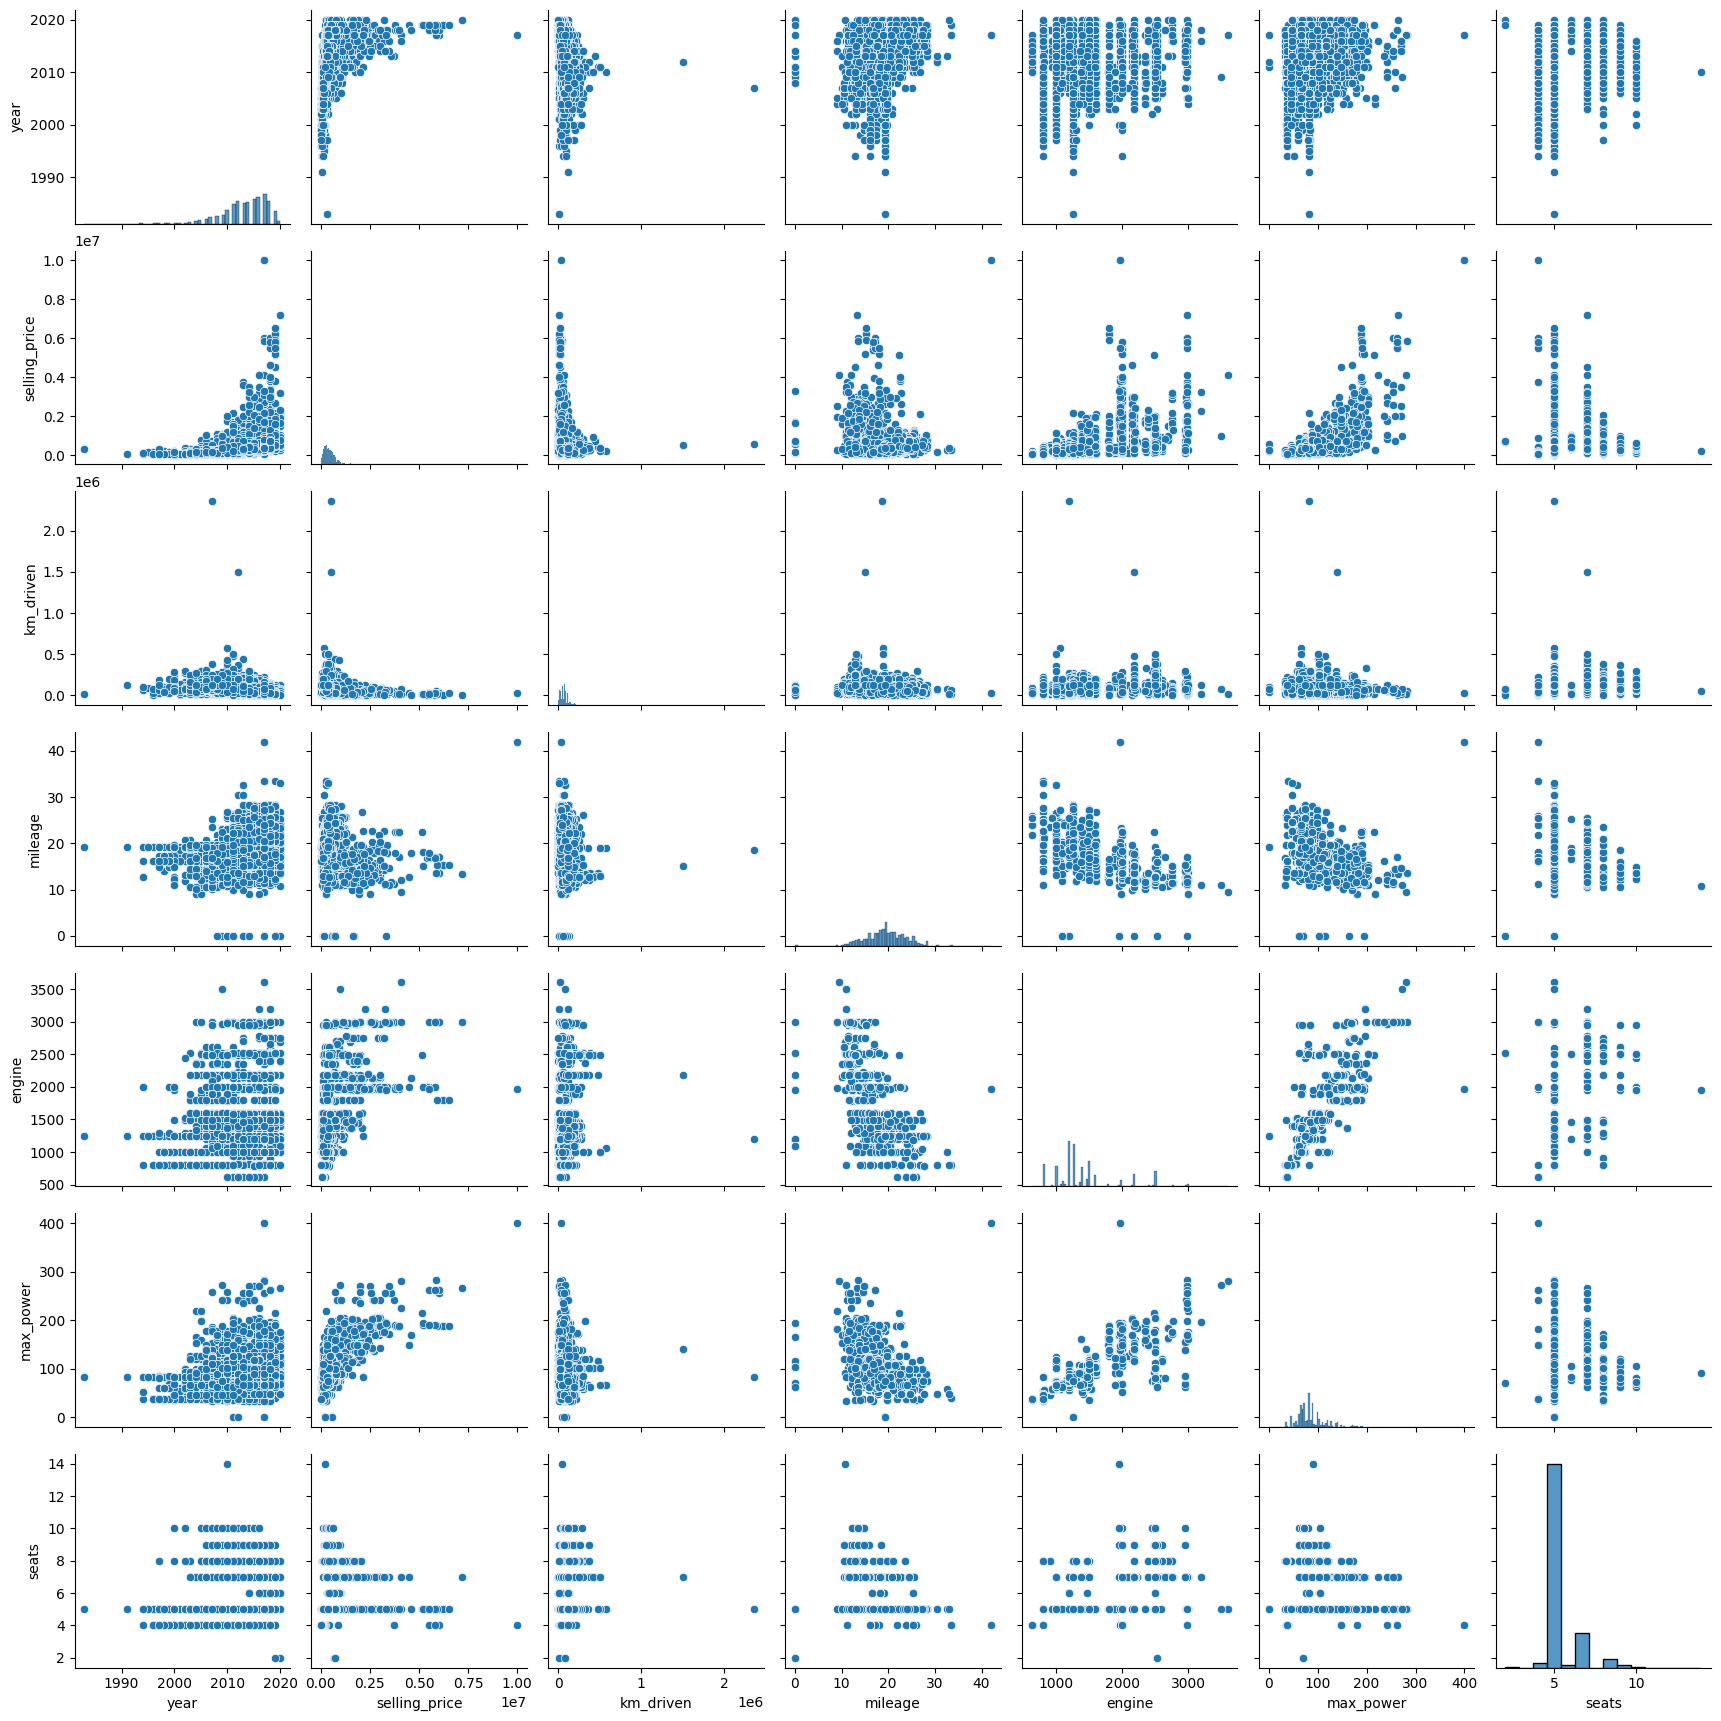

In [164]:
sns.pairplot(df_train)

## Тестовый датасет

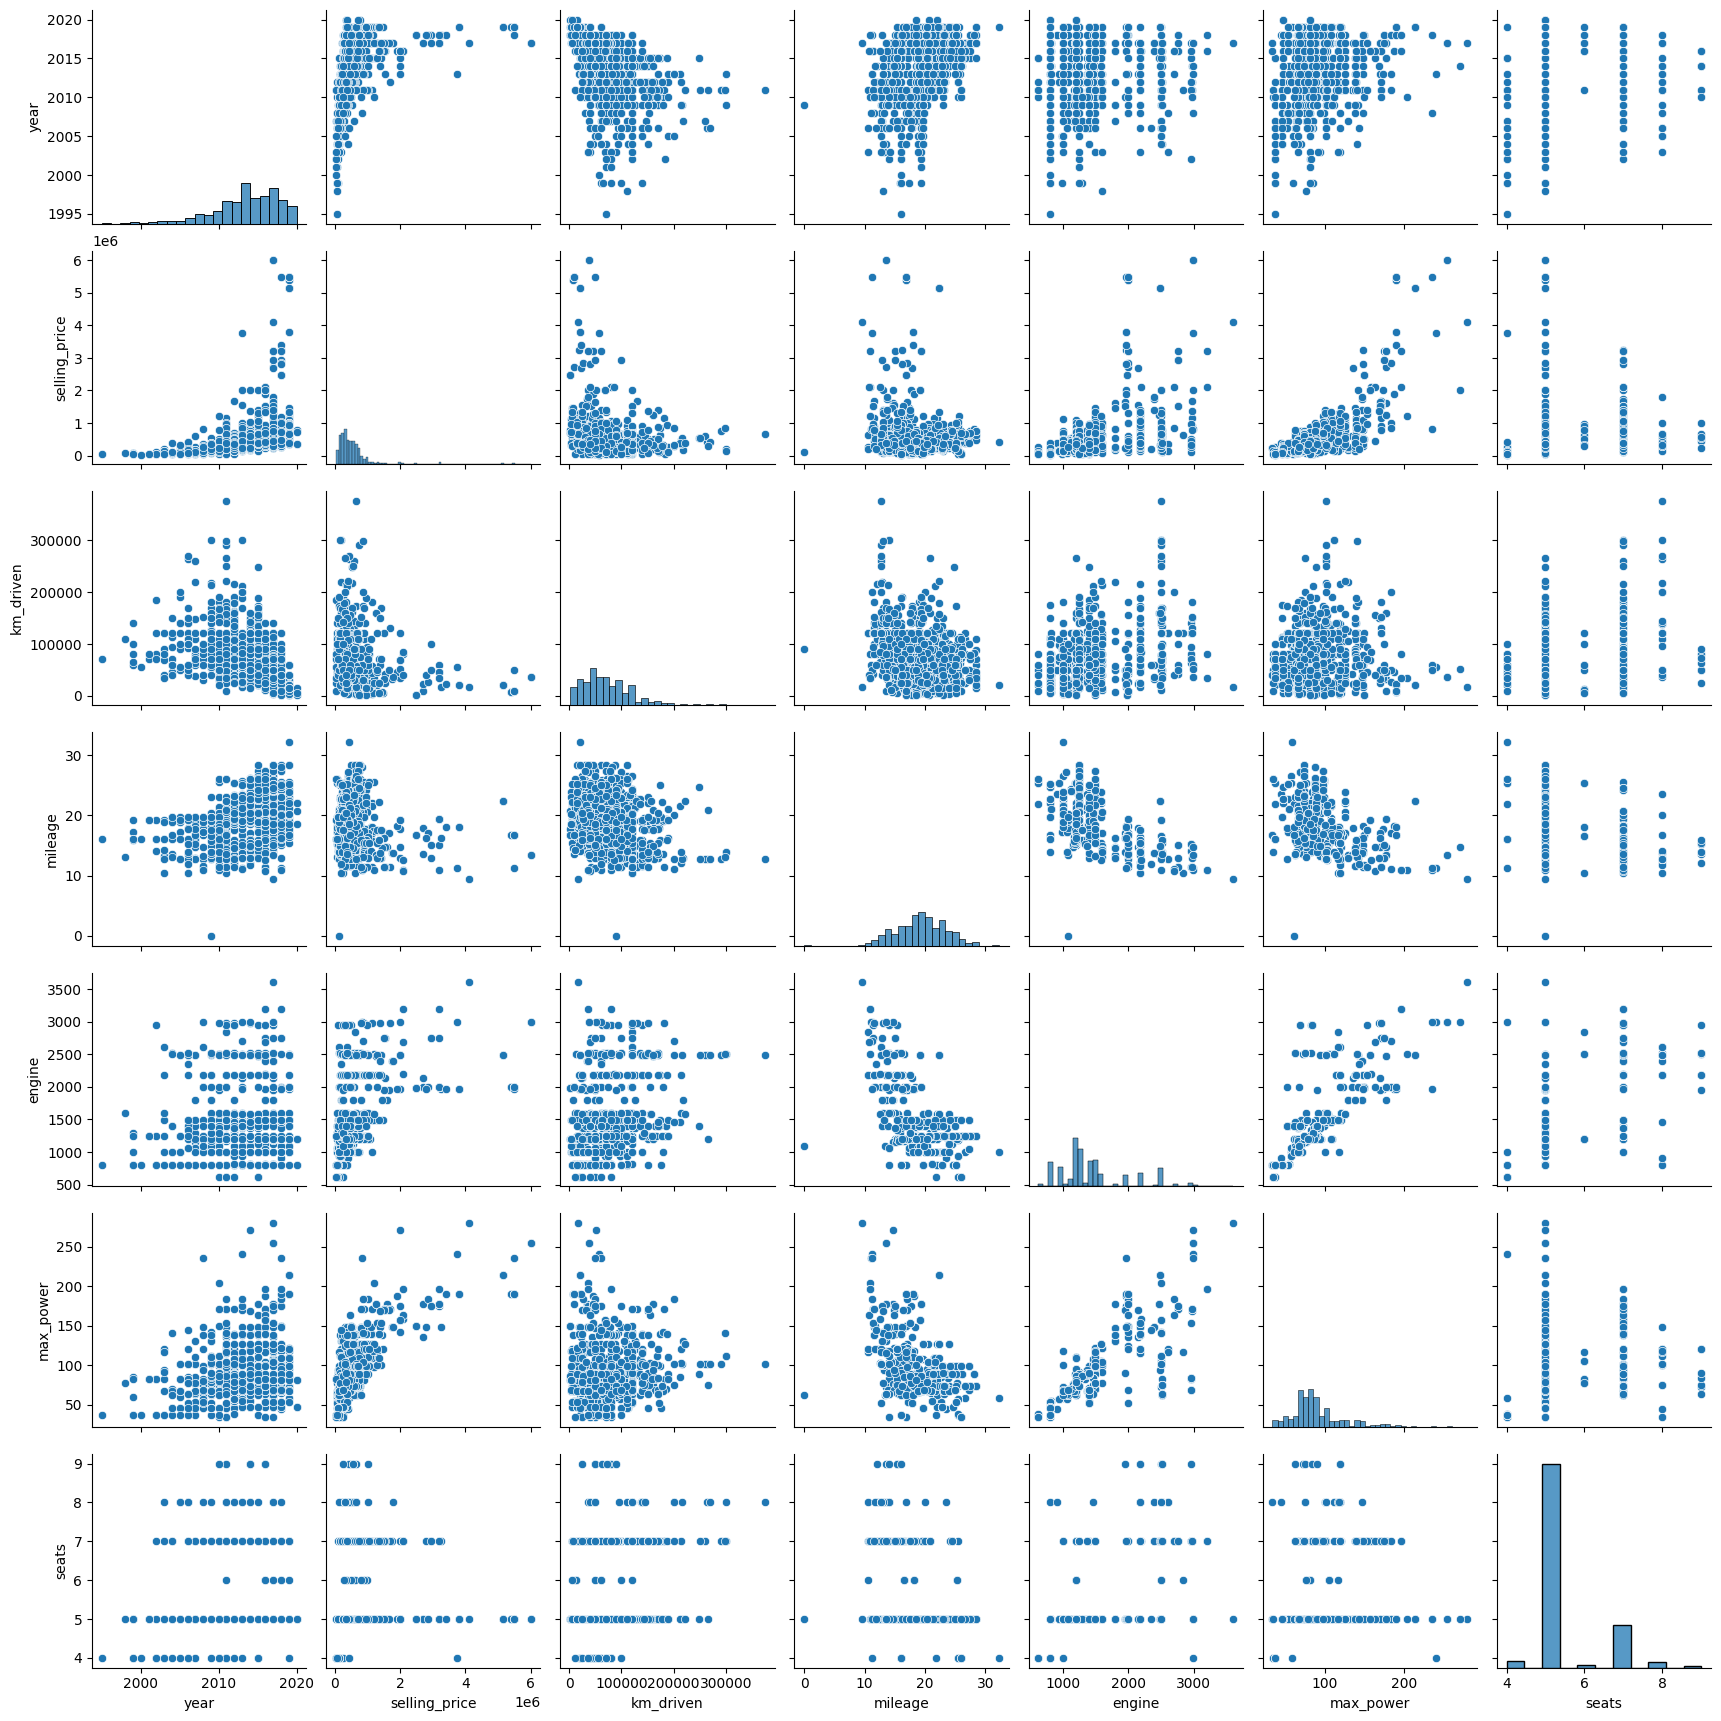

In [165]:
sns.pairplot(df_test)

1.
   - На графиках для **df_train** видно, что **engine** и **max_power** имеют положительную зависимость с **selling_price**
   - **year** также имеет положительную связь с ценой, новые автомобили стоят дороже
   - **mileage** и **km_driven** показывают слабую зависимость от цены, с разбросом точек на графиках

2.
   - **engine** и **max_power** предполагает зависимость между двигателем и мощностью

3.
   - Графики **df_train** и **df_test** схожи, особенно по признакам **engine**, **max_power** и **year**.
   - Различия в распределении признаков могут указывать на случайные отклонения

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [195]:
df_test.select_dtypes(include=['float64', 'int64']).corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.416422,-0.469142,0.341842,0.013145,0.228991,0.019283
selling_price,0.416422,1.000000,-0.235824,-0.150103,0.468086,0.750928,0.086948
km_driven,-0.469142,-0.235824,1.000000,-0.257246,0.289379,0.022857,0.286780
mileage,0.341842,-0.150103,-0.257246,1.000000,-0.601678,-0.404634,-0.473993
engine,0.013145,0.468086,0.289379,-0.601678,1.000000,0.726937,0.634820
max_power,0.228991,0.750928,0.022857,-0.404634,0.726937,1.000000,0.262950
seats,0.019283,0.086948,0.286780,-0.473993,0.634820,0.262950,1.000000


In [166]:
correlation_matrix = df_train.select_dtypes(include=['float64', 'int64']).corr()
correlation_matrix

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.426674,-0.372163,0.341491,0.003560,0.156590,0.043072
selling_price,0.426674,1.000000,-0.165215,-0.106015,0.447281,0.691249,0.150927
km_driven,-0.372163,-0.165215,1.000000,-0.183398,0.231840,0.028298,0.191398
mileage,0.341491,-0.106015,-0.183398,1.000000,-0.572255,-0.373738,-0.452230
engine,0.003560,0.447281,0.231840,-0.572255,1.000000,0.682484,0.651942
max_power,0.156590,0.691249,0.028298,-0.373738,0.682484,1.000000,0.245108
seats,0.043072,0.150927,0.191398,-0.452230,0.651942,0.245108,1.000000


<Axes: >

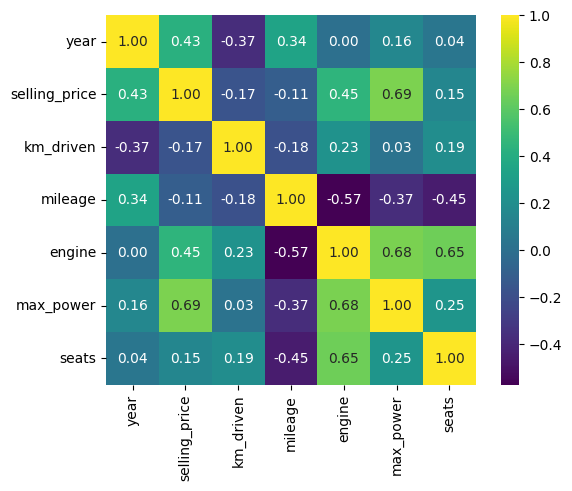

In [167]:
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', square=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

### Ответы:

1. `year` и `seats` (корреляция `0.010536`)

2. `selling_price` и `max_power` (корреляция `0.747050`)

3. Да. Корреляция между `year` и `km_driven` составляет `-0.411504`, что указывает на обратную зависимость

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

**Функция для визуализации распределений и boxplot числовых признаков**

In [222]:
def plot_feature_distributions(data, features):
    for feature in features:
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))

        sns.histplot(data[feature], bins=30, kde=True, ax=axes[0], color='skyblue', edgecolor='black')
        axes[0].set_title(f'Распределение {feature}', fontsize=14)
        axes[0].set_xlabel(feature, fontsize=12)
        axes[0].set_ylabel('Частота', fontsize=12)
        axes[0].grid(visible=True, linestyle='--', alpha=0.6)

        sns.boxplot(y=data[feature], ax=axes[1], color='lightgreen', width=0.5)
        axes[1].set_title(f'Boxplot {feature}', fontsize=14)
        axes[1].set_ylabel(feature, fontsize=12)
        axes[1].grid(visible=True, linestyle='--', alpha=0.6)

        plt.tight_layout()
        plt.show()

## Тренировочный датасет

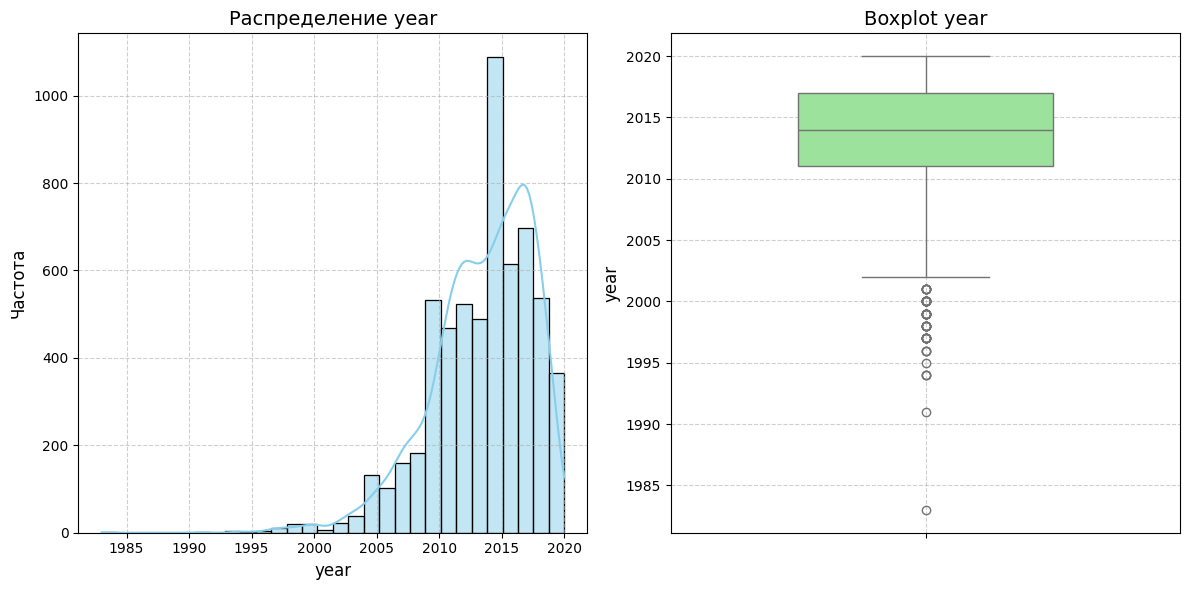

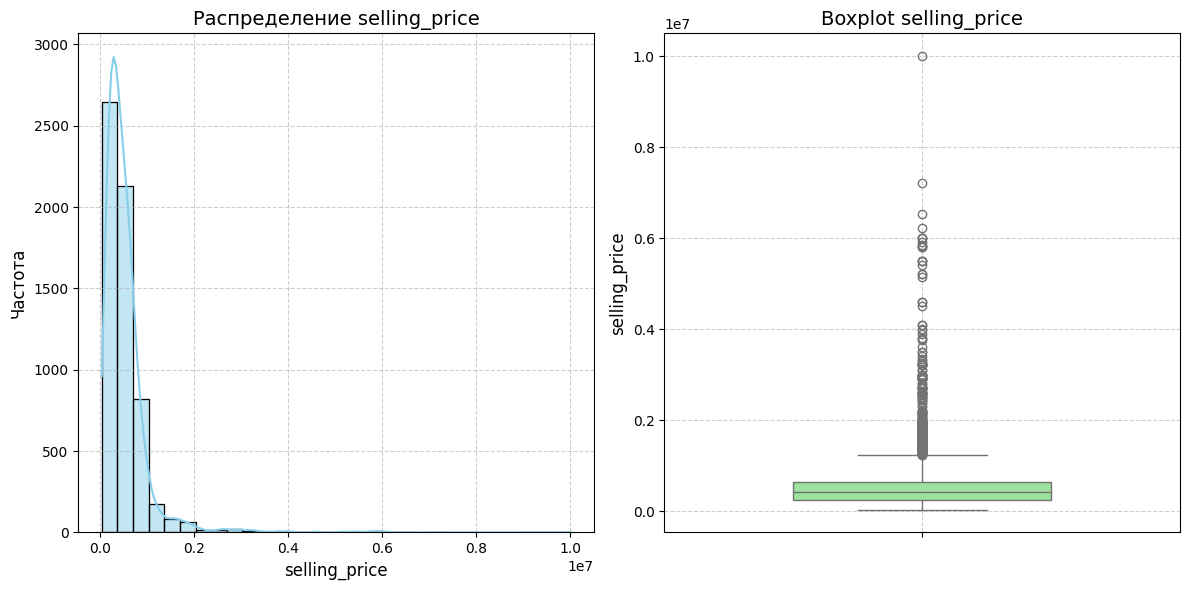

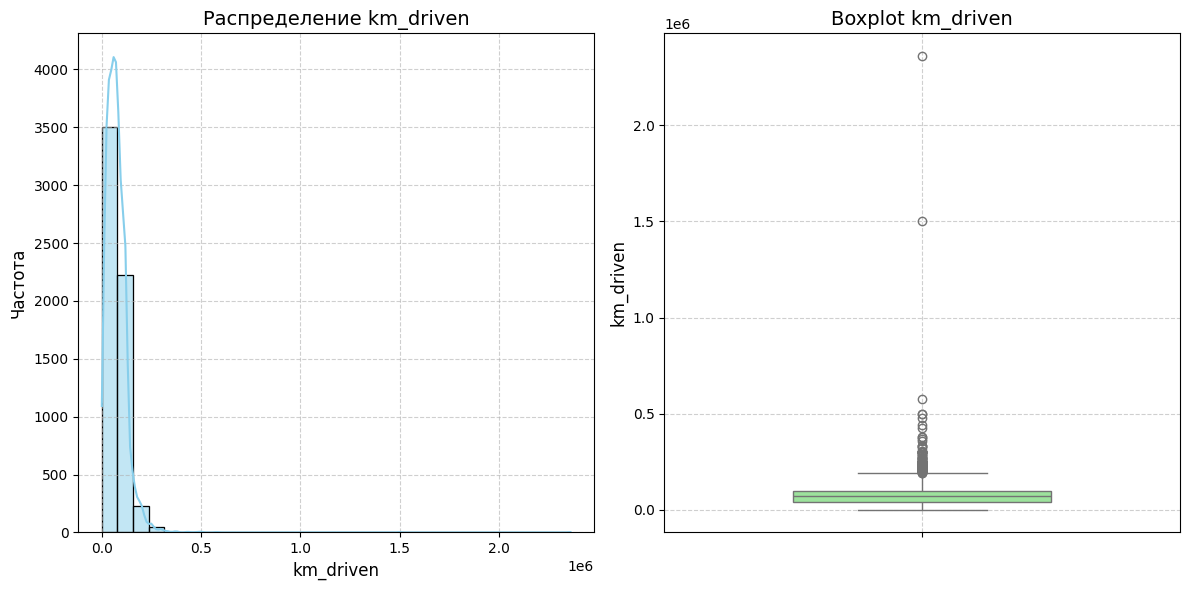

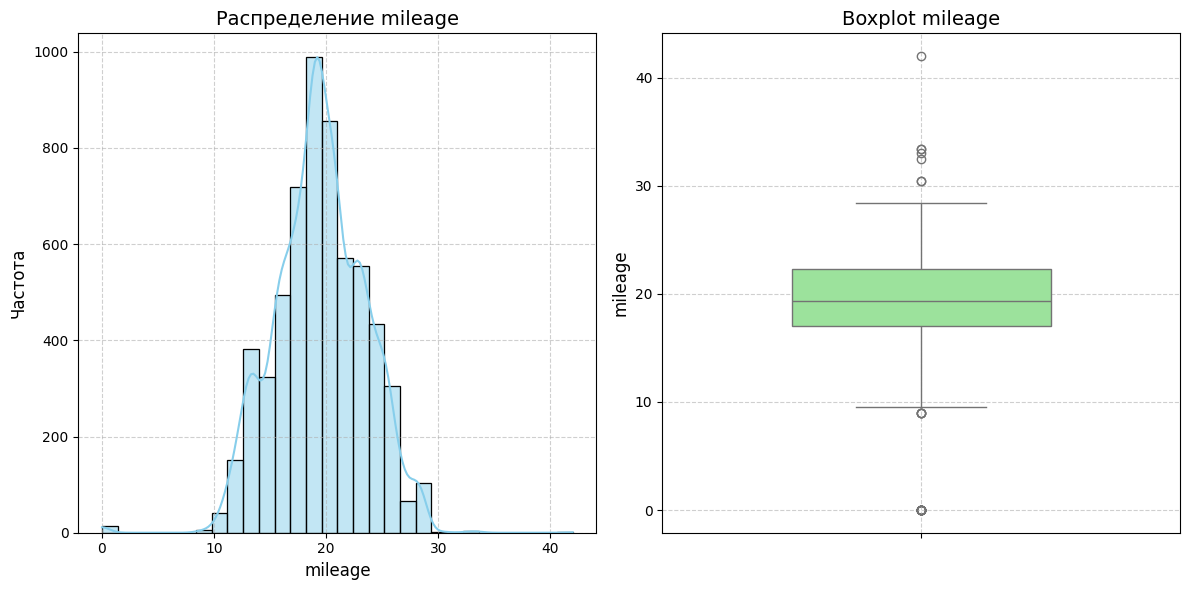

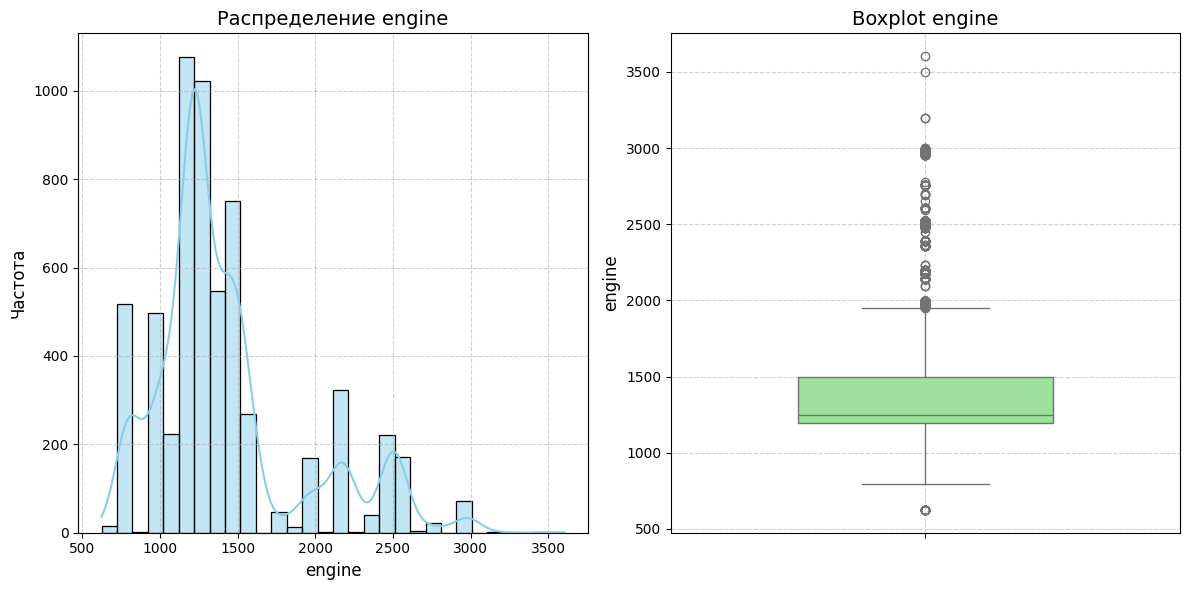

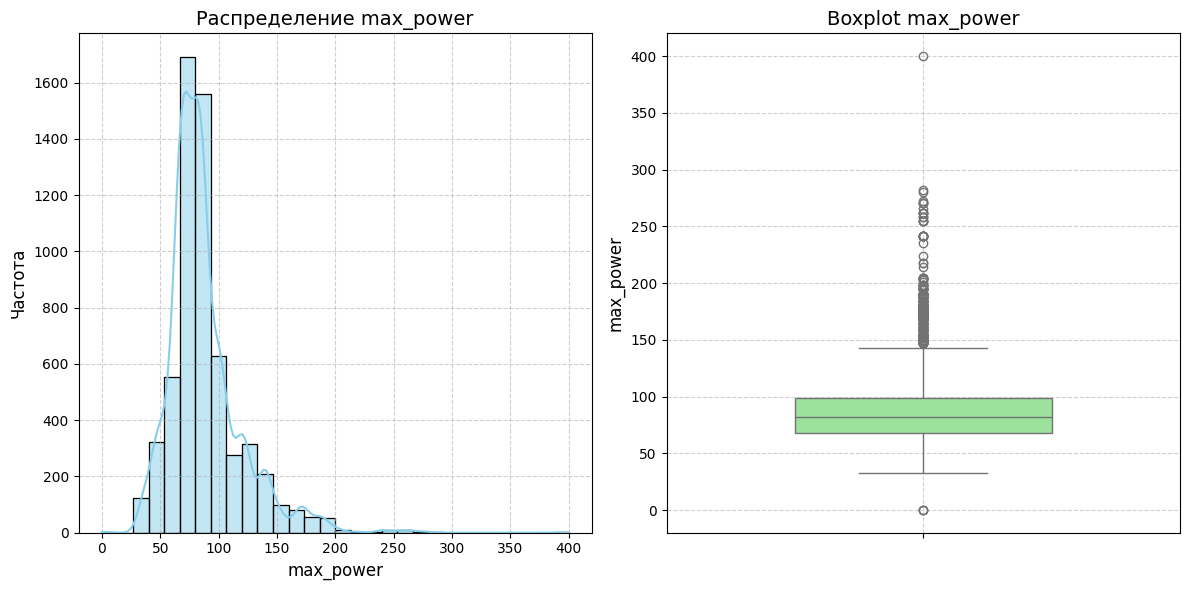

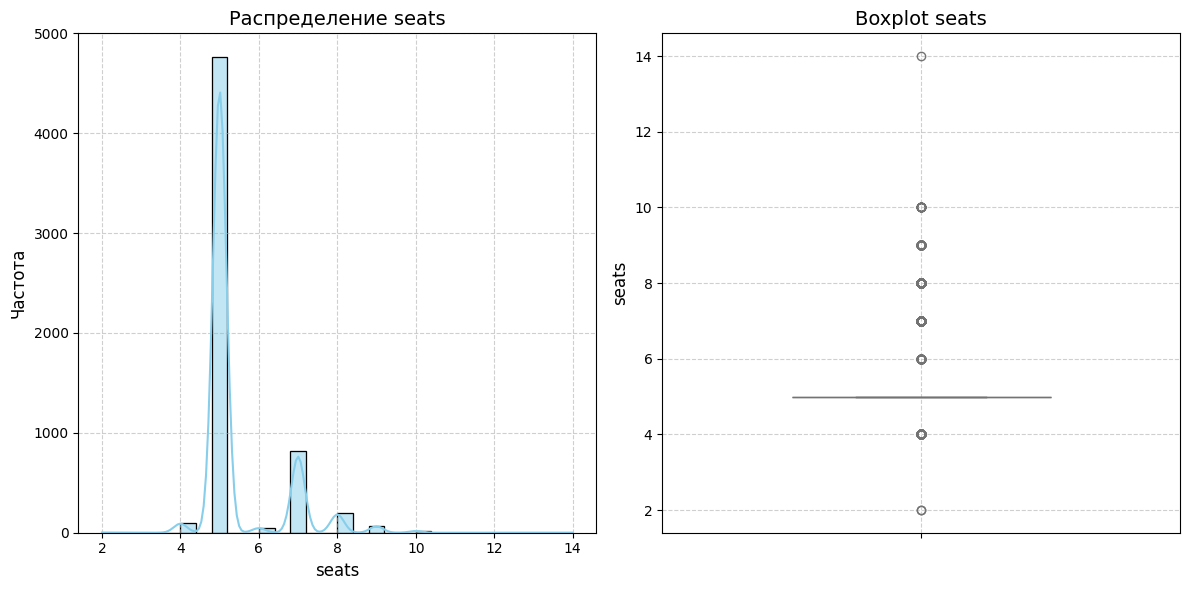

In [220]:
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
plot_feature_distributions(df_train, numerical_features)

## Тестовый датасет

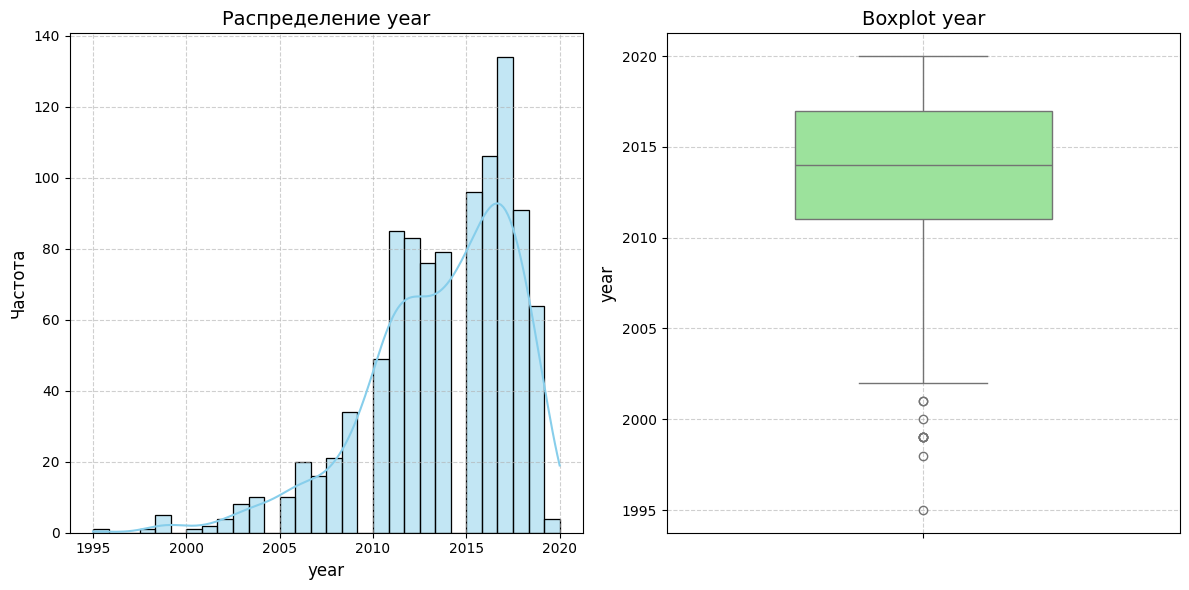

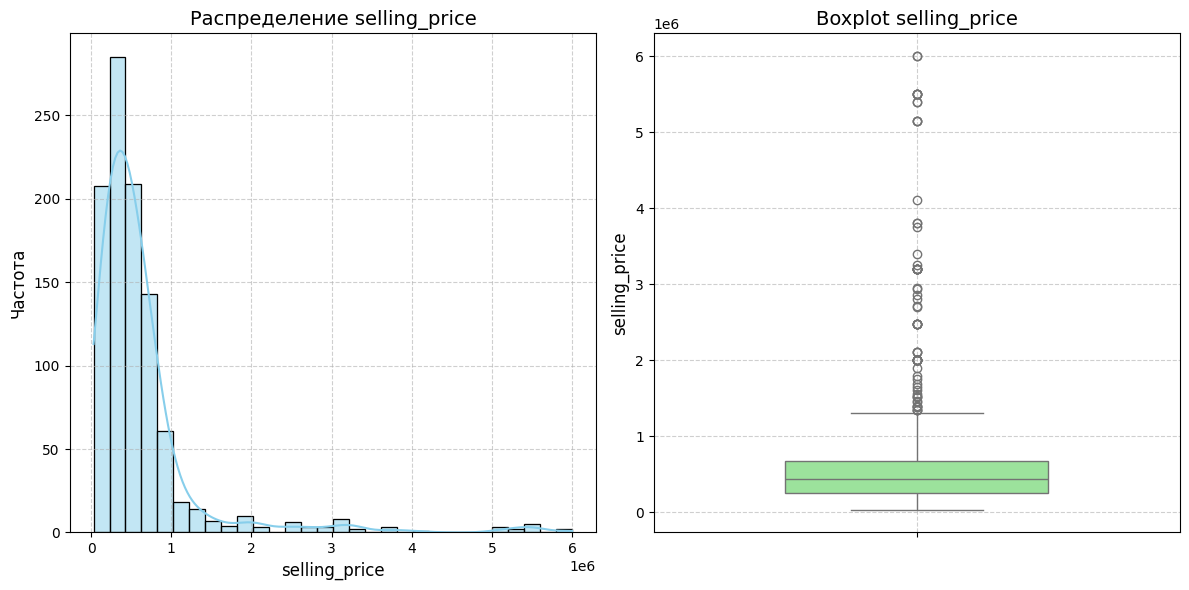

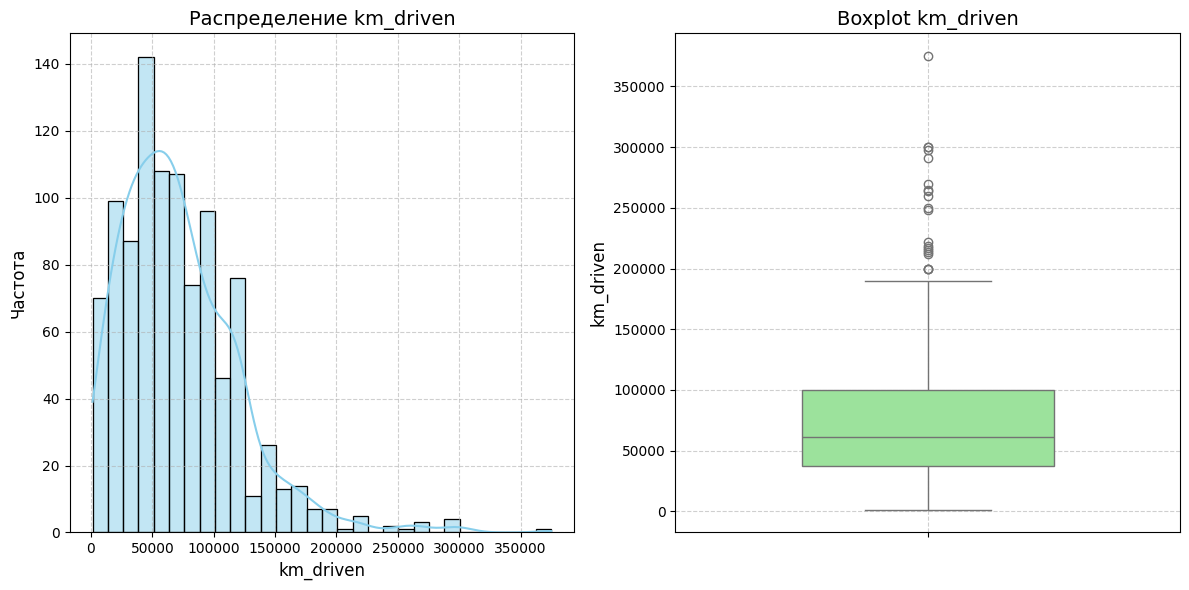

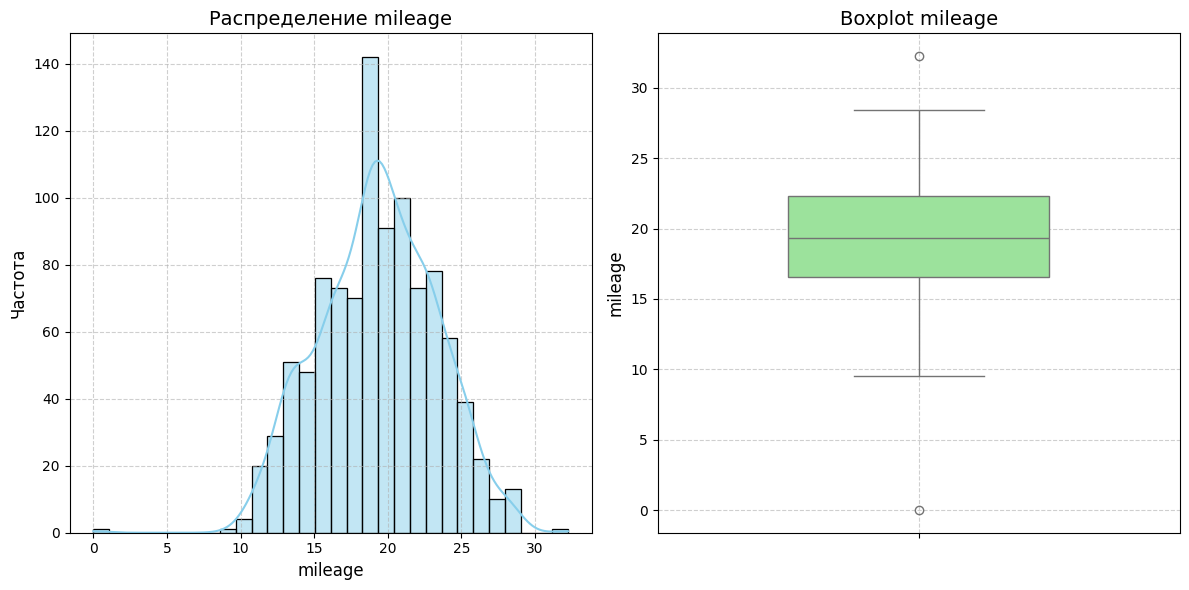

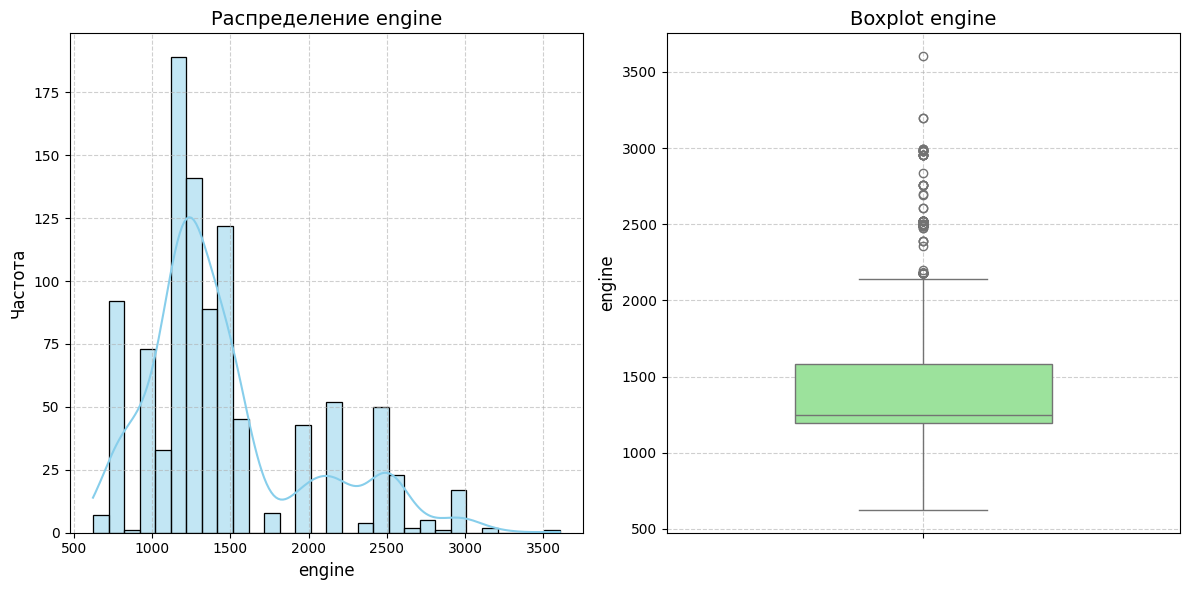

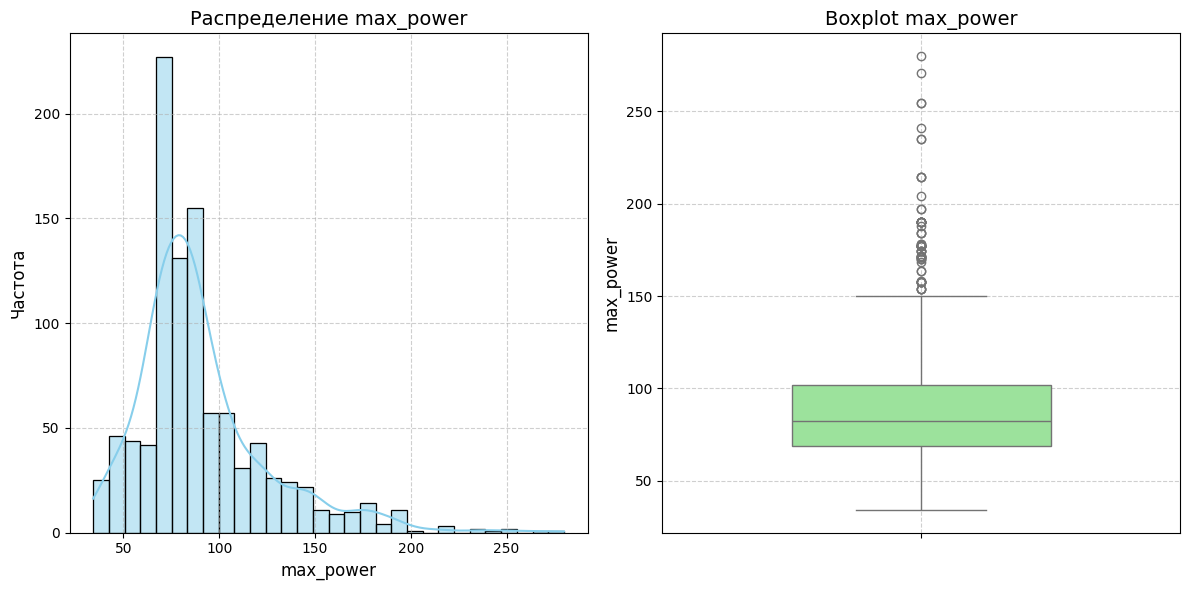

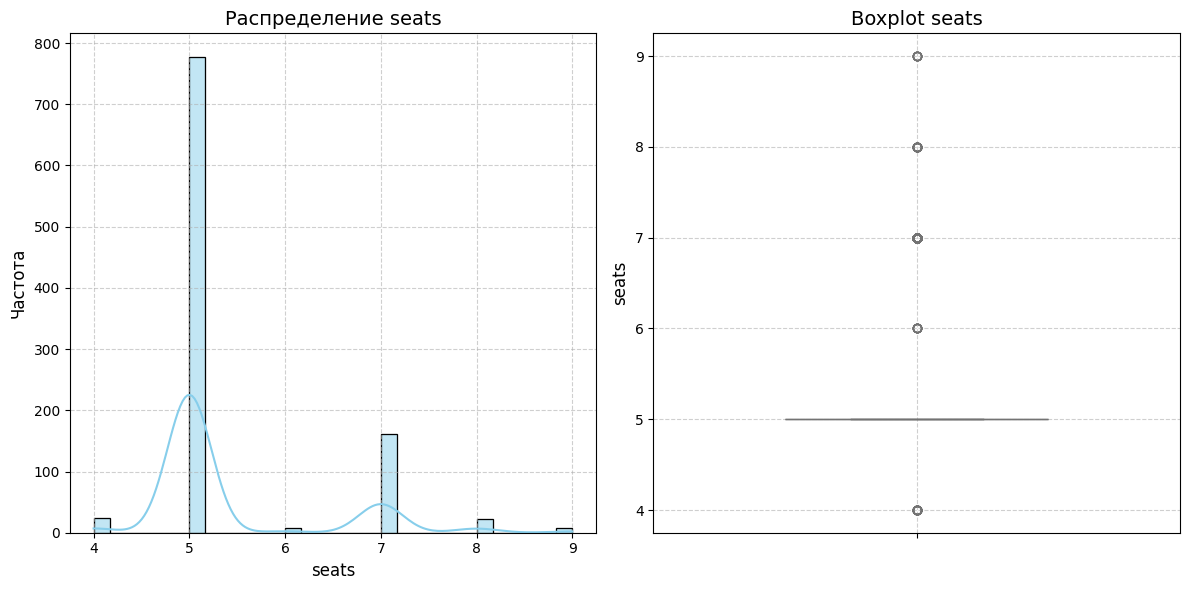

In [221]:
numerical_features = df_test.select_dtypes(include=['float64', 'int64']).columns.tolist()
plot_feature_distributions(df_test, numerical_features)

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [168]:
numeric_df_train = df_train.select_dtypes(include=['float64', 'int64']).copy()
numeric_df_test = df_test.select_dtypes(include=['float64', 'int64']).copy()

In [169]:
y_train = numeric_df_train['selling_price']
X_train = numeric_df_train.drop(columns=['selling_price'])

In [170]:
y_test = numeric_df_test['selling_price']
X_test = numeric_df_test.drop(columns=['selling_price'])

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

Создадим функцию `evaluate_model()` для расчёта и вывода \( R^2 \) и \( MSE \) на тренировочных и тестовых данных

In [171]:
from sklearn.metrics import mean_squared_error as MSE, r2_score

def evaluate_model(model, X_train, y_train, X_test, y_test):
    metrics = {
        "Train R²": r2_score(y_train, model.predict(X_train)),
        "Train MSE": MSE(y_train, model.predict(X_train)),
        "Test R²": r2_score(y_test, model.predict(X_test)),
        "Test MSE": MSE(y_test, model.predict(X_test)),
    }
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression().fit(X_train, y_train)

evaluate_model(model, X_train, y_train, X_test, y_test)

Train R²: 0.59
Train MSE: 116824396648.12
Test R²: 0.59
Test MSE: 233355353055.14


## Выводы:

**R²**: Модель объясняет 60% дисперсии

**MSE**: Высокие значения из-за масштаба `selling_price` и выбросов.  

**Сравнение**: Метрики на тренировочных и тестовых данных сопоставимы, переобучения нет

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

model = LinearRegression().fit(X_train_scaled, y_train)

evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

Train R²: 0.59
Train MSE: 116824396648.12
Test R²: 0.59
Test MSE: 233355353055.14


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [174]:
most_informative = max(zip(X_train.columns, model.coef_), key=lambda x: abs(x[1]))[0]
print(f"Наиболее информативный признак в предсказании цены: {most_informative}")

Наиболее информативный признак в предсказании цены: max_power


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [175]:
from sklearn.linear_model import Lasso

lasso_model = Lasso().fit(X_train_scaled, y_train)

evaluate_model(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

Train R²: 0.59
Train MSE: 116824396658.24
Test R²: 0.59
Test MSE: 233356033865.21


In [176]:
zeroed_features = [feature for feature, coef in zip(X_train.columns, lasso_model.coef_) if coef == 0]
print("Зануленные признаки:", zeroed_features)

Зануленные признаки: []


alpha=1.0 недостаточно для зануления коэффициентов из-за сильной корреляции признаков с целевой переменной

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [177]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1, 10, 50, 100, 200]}

grid_search = GridSearchCV(Lasso(), param_grid, cv=10, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
zeroed_features = [feature for feature, coef in zip(X_train.columns, grid_search.best_estimator_.coef_) if coef == 0]

In [ ]:
print(f"Количество моделей: {len(param_grid['alpha']) * 10}")
print(f"Лучший коэффициент регуляризации: {best_alpha}")
print(f"Зануленные признаки: {zeroed_features}")

Количество моделей: 60
Лучший коэффициент регуляризации: 200
Зануленные признаки: []


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [178]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.1, 1, 10, 50, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}

grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]},
             scoring='r2')

In [179]:
print(f"Количество моделей: {len(param_grid['alpha']) * len(param_grid['l1_ratio']) * 10}")
print(f"Лучшие параметры: {grid_search.best_params_}")

Количество моделей: 250
Лучшие параметры: {'alpha': 1, 'l1_ratio': 0.9}


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`



```
df_train.drop(columns=['name'], inplace=True)
```



В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [180]:
df_train['name'] = df_train['name'].str.extract(r'^(\S+)')
df_train['name'].unique()

array(['Maruti', 'Skoda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Honda', 'Chevrolet', 'Fiat', 'Datsun', 'Tata', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Isuzu', 'Peugeot'], dtype=object)

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [181]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_df = pd.DataFrame(
    encoder.fit_transform(df_train[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features),
    index=df_train.index
)
df_train = pd.concat([df_train.drop(columns=categorical_features), encoded_df], axis=1)

In [182]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6014 entries, 0 to 6013
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          6014 non-null   int64  
 1   selling_price                 6014 non-null   int64  
 2   km_driven                     6014 non-null   int64  
 3   mileage                       6014 non-null   float64
 4   engine                        6014 non-null   int64  
 5   max_power                     6014 non-null   float64
 6   name_Audi                     6014 non-null   float64
 7   name_BMW                      6014 non-null   float64
 8   name_Chevrolet                6014 non-null   float64
 9   name_Daewoo                   6014 non-null   float64
 10  name_Datsun                   6014 non-null   float64
 11  name_Fiat                     6014 non-null   float64
 12  name_Force                    6014 non-null   float64
 13  nam

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [189]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1, 10, 50, 100, 200]}

ridge_model = GridSearchCV(Ridge(), param_grid, cv=10, scoring='r2')
ridge_model.fit(X_train_scaled, y_train)

evaluate_model(ridge_model.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test)

Train R²: 0.59
Train MSE: 116978161417.23
Test R²: 0.59
Test MSE: 237588838647.89


In [190]:
print(f"Лучший параметр: {ridge_model.best_params_['alpha']}")

Лучший параметр: 200


**Нет, не удалось!**

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [204]:
import numpy as np

def business_metric(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) <= 0.1 * y_true)

models = {
    "Linear Regression": model,
    "Lasso": lasso_model,
    "Ridge": ridge_model
}

for model_name, trained_model in models.items():
    y_pred = trained_model.predict(X_test_scaled)
    metric_value = business_metric(y_test, y_pred) * 100
    print(f"{model_name} = {metric_value:.2f}%")

Linear Regression = 22.30%
Lasso = 22.30%
Ridge = 22.30%


Все три модели демонстрируют одинаковое значение бизнес-метрики (22,30%)

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

